<a href="https://colab.research.google.com/github/anupstar100/Seoul-Bike-Sharing-Demand-Prediction/blob/main/SML_Capstone_Project_Bike_Sharing_Demand_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

# **Importing Libraries**



In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

# **Loading dataset and having first view**

In [2]:
# MOUNTING THE GOOGLE DRIVE

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# LOADING THE DATA
# SETTING ENCODING AS UNICODE_ESCAPE BECAUSE IT GIVES UTF-8 ENCODING ERROR

df = pd.read_csv(r'/content/drive/MyDrive/Capston Project/Bike Sharing Demand Prediction/SeoulBikeData.csv', encoding = 'unicode_escape')
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [4]:
df.tail()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


# **Exploratory Data Analysis and Data Preprocessing**

In [5]:
# CHECKING THE SHAPE OF OUR DATASET

df.shape

(8760, 14)

*Observations:*

---
1. The data contains 8760 rows and 14 columns.
2. The dataset the data of one year on daily basis from 1/12/2017 to 30/11/2018 i.e., 365 days each hour.
  * 1 day = 24 hours and 1 year = 365 days. So, 1 year = 8,760 rows of data.

In [6]:
# CHECKING FOR NULL VALUES AS WELL AS DATATYPES

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

*Observations:*

---
1. There are no null values.
2. There are 10 numerical columns and 4 categorical columns.
3. 'Date' column is of 'object' data type.

In [7]:
df.isna().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

*Observation:*

---
With this, we can say that there are no null values present in our dataset.

In [8]:
# CONVERTING THE DATA TYPE OF 'DATE' COLUMN FROM 'OBJECT' TO 'DATE'

df['Date'] = pd.to_datetime(df['Date'], format = '%d/%m/%Y')
df['Date'][:6]

0   2017-12-01
1   2017-12-01
2   2017-12-01
3   2017-12-01
4   2017-12-01
5   2017-12-01
Name: Date, dtype: datetime64[ns]

In [9]:
# CHECKING FOR THE STATISTICAL INFORMATION

df.describe().T

,count,mean,std,min,25%,50%,75%,max
Rented Bike Count,8760.0,704.602055,644.997468,0.0,191.00,504.50,1065.25,3556.00
Hour,8760.0,11.500000,6.922582,0.0,5.75,11.50,17.25,23.00
Temperature(°C),8760.0,12.882922,11.944825,-17.8,3.50,13.70,22.50,39.40
Humidity(%),8760.0,58.226256,20.362413,0.0,42.00,57.00,74.00,98.00
Wind speed (m/s),8760.0,1.724909,1.036300,0.0,0.90,1.50,2.30,7.40
Visibility (10m),8760.0,1436.825799,608.298712,27.0,940.00,1698.00,2000.00,2000.00
Dew point temperature(°C),8760.0,4.073813,13.060369,-30.6,-4.70,5.10,14.80,27.20
Solar Radiation (MJ/m2),8760.0,0.569111,0.868746,0.0,0.00,0.01,0.93,3.52
Rainfall(mm),8760.0,0.148687,1.128193,0.0,0.00,0.00,0.00,35.00
Snowfall (cm),8760.0,0.075068,0.436746,0.0,0.00,0.00,0.00,8.80


*Observations:*

---
* There might be outliers in 'Visibility (10m)' and 'Solar Radiation (MJ/m2)' as the difference between their mean and median is large.

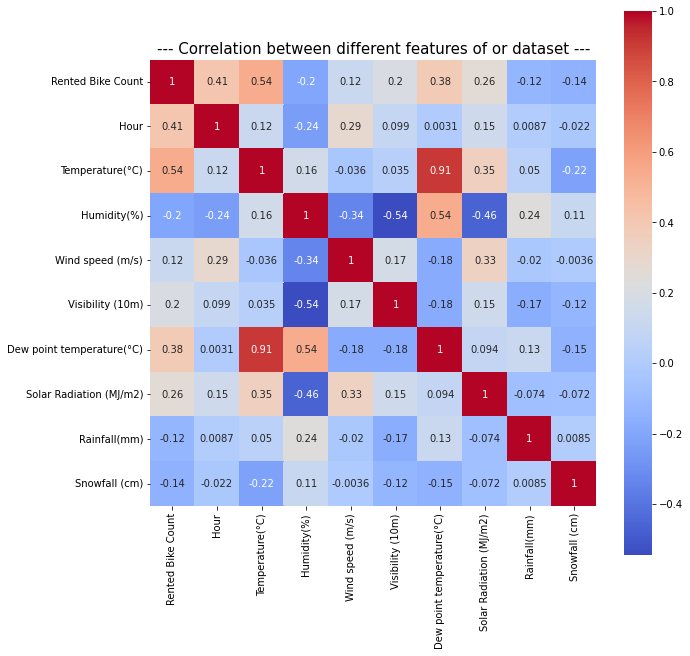

In [10]:
# CHECKING FOR CORRELATION

plt.figure(figsize = (10, 10))
plt.title('--- Correlation between different features of or dataset ---', size = 15)
sns.heatmap(df.corr(), cmap = 'coolwarm', annot = True, square = True)

**Observation:**
1. We can see that with our targer variable (Rented Bike Count), the most correlated variables are:
    * Hour
    * Temperature
    * Dew point temperature
    * solar radiation

2. Dew point tempearture is highly correlated with our target variable. This can cause multicolinearity problem in future. So, we can drop it.

In [11]:
df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [12]:
# DROPPING THE COLUMN 'DEW POINT TEMPERATURE'

del df['Dew point temperature(°C)']

In [13]:
df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Solar Radiation (MJ/m2)',
       'Rainfall(mm)', 'Snowfall (cm)', 'Seasons', 'Holiday',
       'Functioning Day'],
      dtype='object')

In [33]:
# LIST OF SORTED CORRELATION OF THE VARIABLES WITH THE TARGET

pd.DataFrame(df.corr().unstack().sort_values(ascending = False)['Rented Bike Count'], columns = ['Correlation with the target'])

,Correlation with the target
Rented Bike Count,1.000000
Temperature(°C),0.538558
Hour,0.410257
Solar Radiation (MJ/m2),0.261837
Visibility (10m),0.199280
month,0.133514
Wind speed (m/s),0.121108
Rainfall(mm),-0.123074
Snowfall (cm),-0.141804
Humidity(%),-0.199780


# **Data Processing and Data Visualization**

### Creating required variables

In [79]:
# DAY OR NIGHT
df['day_night'] = df['Hour'].apply(lambda x: 'Night' if (x > 20 or x < 5) else ('Day'))

# DAY OF THE WEEK
df['weekdays'] = df['Date'].dt.day_name()

# MONTH NUMBER
df['month'] = df['Date'].dt.month

In [17]:
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,day_night,weekday,month
0,2017-12-01,254,0,-5.2,37,2.2,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,Night,Friday,12
1,2017-12-01,204,1,-5.5,38,0.8,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,Night,Friday,12
2,2017-12-01,173,2,-6.0,39,1.0,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,Night,Friday,12
3,2017-12-01,107,3,-6.2,40,0.9,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,Night,Friday,12
4,2017-12-01,78,4,-6.0,36,2.3,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,Night,Friday,12


### Ploting variables to the target

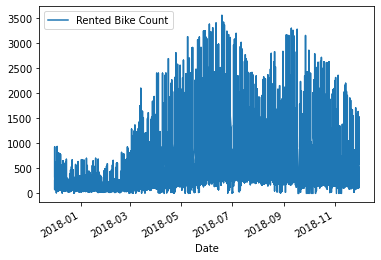

In [18]:
# DATE V/S RENTED BIKE COUNT
df.plot(x = 'Date', y = 'Rented Bike Count', kind = 'line')

***Observations:***

---
1. In this plot, we see a high raise between april to automn of bikes rent i.e., in *Summer*

In [19]:
# GROUPING BY SEASONS AND CALCULATING THE TOTAL RENTED BIKE COUNT
df.groupby('Seasons').sum()['Rented Bike Count'].sort_values(ascending = False).reset_index()

,Seasons,Rented Bike Count
0,Summer,2283234
1,Autumn,1790002
2,Spring,1611909
3,Winter,487169


* As we already saw that Rented bike is most during Summer.

In [21]:
# TRYING TO FIND THE REASON BEHIND THE INCREASING DEMAND OF RENTED BIKES DURING SUMMER
for col in ['Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)', 'Visibility (10m)', 'Solar Radiation (MJ/m2)', 'Snowfall (cm)']:
  print(f'\n---------- {col} ----------')
  print(df.groupby('Seasons').sum()[col].sort_values(ascending = False))


---------- Temperature(°C) ----------
Seasons
Summer    58694.8
Autumn    30839.9
Spring    28807.1
Winter    -5487.4
Name: Temperature(°C), dtype: float64

---------- Humidity(%) ----------
Seasons
Summer    143479
Spring    129779
Autumn    129355
Winter    107449
Name: Humidity(%), dtype: int64

---------- Wind speed (m/s) ----------
Seasons
Winter    4153.0
Spring    4139.1
Summer    3553.6
Autumn    3264.5
Name: Wind speed (m/s), dtype: float64

---------- Visibility (10m) ----------
Seasons
Autumn    3408683
Summer    3315854
Winter    3123332
Spring    2738725
Name: Visibility (10m), dtype: int64

---------- Solar Radiation (MJ/m2) ----------
Seasons
Summer    1680.85
Spring    1520.84
Autumn    1139.65
Winter     644.07
Name: Solar Radiation (MJ/m2), dtype: float64

---------- Snowfall (cm) ----------
Seasons
Winter    534.6
Autumn    123.0
Spring      0.0
Summer      0.0
Name: Snowfall (cm), dtype: float64


***Observations:***

---



1. **Temperature:** In case of temperature, in summer, temperature is high. So, korean people migh like driving bike in summer when the day is hot. 
2. **Humidity:** In case of humidity, the spread in all four seasons is almost equal. So, maybe humidity is not a big factor.
3. **Wind Speed:** In case of wind sppe, the values are almost equal.
4. **Visiability:** In case of visibility, the values are almost same.
5. **Solar Radiation:** In case of soalr radiation, in summer, solar radiation is high. So, korean people might like driving a when the solar radiation is high.
6. **Snowfall:** In summer, snowfall is 0 which is obvious. So, it might not a big factor.

([<matplotlib.patches.Wedge at 0x7fca2e6b5650>,
 [Text(0.6741841102813056, 0.869181100487237, 'Winter'),
  Text(-0.9658645988140421, 0.5264081845467353, 'Spring'),
  Text(-0.10456377263490688, -1.1954356601057021, 'Summer'),
  Text(1.0663566130428606, -0.26996957943397826, 'Autumn')],
 [Text(0.3677367874261667, 0.4740987820839474, '29.0%'),
  Text(-0.5268352357167502, 0.28713173702549194, '26.1%'),
  Text(-0.060995534037029, -0.6973374683949928, '37.0%'),
  Text(0.5816490616597421, -0.1472561342367154, '7.9%')])

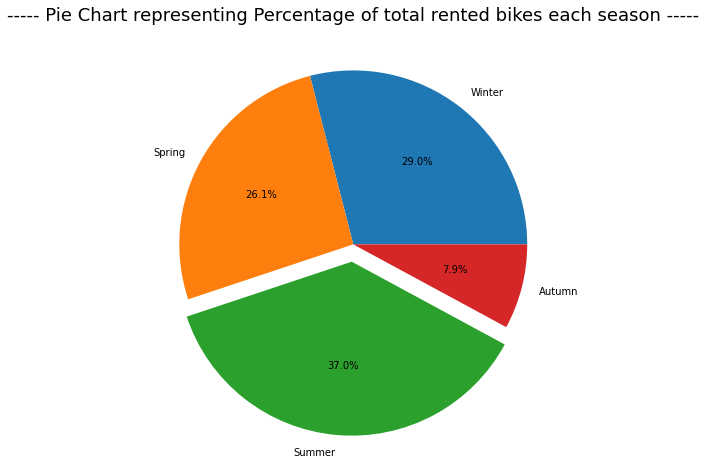

In [49]:
#  PLOTTING A PIE CHART TO VISUALIZE THE TOTAL RENTED BIKE COUNT EACH SEASON
plt.figure(figsize = (8, 8))
plt.title('----- Pie Chart representing Percentage of total rented bikes each season -----', size = 18)
plt.pie(df.groupby('Seasons').sum()['Rented Bike Count'], labels = df.Seasons.unique(), explode = (0, 0, 0.1, 0), autopct = '%1.1f%%')

***Observations:***

---
1. With this we can say that, the demand for rented bike is most in summer (37%) followed by Winter (29%) and then Spring (26.1%).
2. In Automn, the demand is less (7.9%).

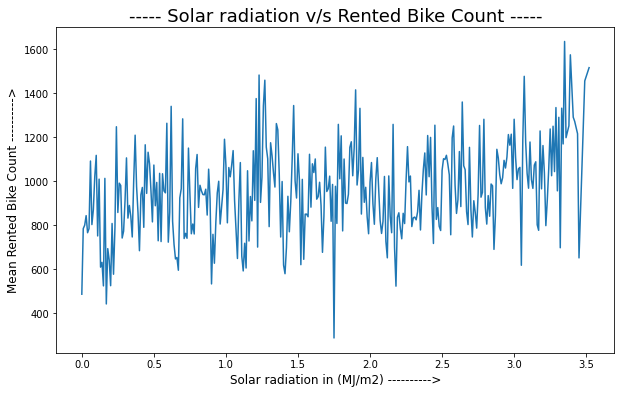

In [47]:
# VISUALIZING THE TOTAL RENTED BIKES COUNT WITH RESPECT TO SOLAR RADIATION
plt.figure(figsize = (10, 6))
plt.xlabel('Solar radiation in (MJ/m2) ---------->', size = 12)
plt.ylabel('Mean Rented Bike Count ---------->', size = 12)
plt.title('----- Solar radiation v/s Rented Bike Count -----', size = 18)
plt.plot(df.groupby('Solar Radiation (MJ/m2)').mean()['Rented Bike Count'])

***Observations:***

---
1. Here, with the increase of solar radiation, demand for bikes also increase.

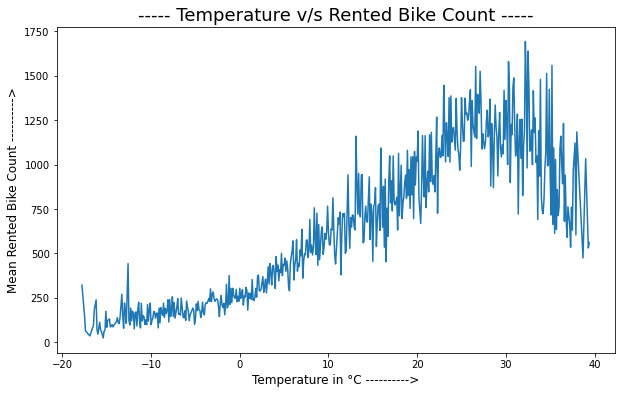

In [51]:
# VISUALIZING THE TOTAL RENTED BIKES COUNT WITH RESPECT TO TEMPERATURE
plt.figure(figsize = (10, 6))
plt.xlabel('Temperature in °C ---------->', size = 12)
plt.ylabel('Mean Rented Bike Count ---------->', size = 12)
plt.title('----- Temperature v/s Rented Bike Count -----', size = 18)
plt.plot(df.groupby('Temperature(°C)').mean()['Rented Bike Count'])

***Observations:***

---
Korean people like to drive bike when it is pretty hot around 25°C.

<BarContainer object of 24 artists>

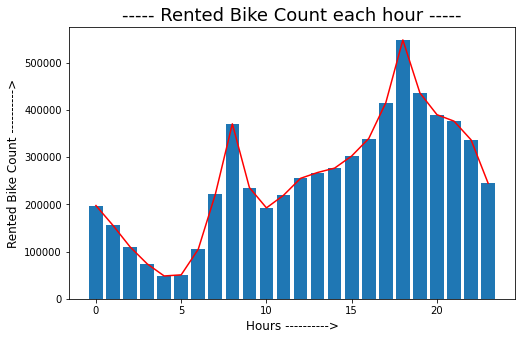

In [114]:
# VISUALIZING THE TOTAL RENTED BIKES COUNT WITH RESPECT TO EACH HOUR
plt.figure(figsize = (8 ,5))
plt.title('----- Rented Bike Count each hour -----', size = 18)
plt.xlabel('Hours ---------->', size = 12)
plt.ylabel('Rented Bike Count ---------->', size = 12)
plt.plot(df.groupby('Hour').sum()['Rented Bike Count'], color = 'red')
plt.bar(x = df.groupby('Hour').sum()['Rented Bike Count'].reset_index()['Hour'], height = df.groupby('Hour').sum()['Rented Bike Count'].reset_index()['Rented Bike Count'])

***Observation:***

---
Here we have a repartition of the rents by hour, at the beginning of the day we suppose people go to work and return by bike.

In [72]:
df.groupby('weekdays').sum()['Rented Bike Count'].sort_values(ascending = False).reset_index()

,weekdays,Rented Bike Count
0,Friday,950334
1,Wednesday,923956
2,Monday,911743
3,Saturday,885492
4,Thursday,861999
5,Tuesday,858596
6,Sunday,780194


*Observation:*

---
The demand for rented bikes is minimum on sunday. So, we can assume that people use bikes mostly to go to school or for work.

([<matplotlib.patches.Wedge at 0x7fca227f6e50>,
 [Text(-0.8480618264914843, 0.8489941922345098, 'Day'),
  Text(0.7773900076171936, -0.7782446762149677, 'Night')],
 [Text(-0.4947027321200325, 0.4952466121367974, '75.0%'),
  Text(0.4240309132457419, -0.42449709611725506, '25.0%')])

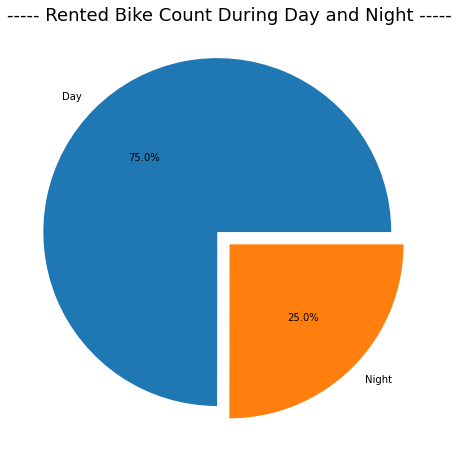

In [115]:
# VISUALIZING THE TOTAL RENTED BIKES COUNT WITH RESPECT TO DAY OR NIGHT
plt.figure(figsize = (8, 8))
plt.title('----- Rented Bike Count During Day and Night -----', size = 18)
plt.pie(df.groupby('day_night').sum()['Rented Bike Count'], labels = ['Day', 'Night'], explode = (0.1, 0), autopct = '%1.1f%%')

*Observations:*

---
The demand for bikes at day time is much more (75%) than at night (25%).

In [73]:
df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Solar Radiation (MJ/m2)',
       'Rainfall(mm)', 'Snowfall (cm)', 'Seasons', 'Holiday',
       'Functioning Day', 'day_night', 'weekday', 'month', 'weekdays'],
      dtype='object')

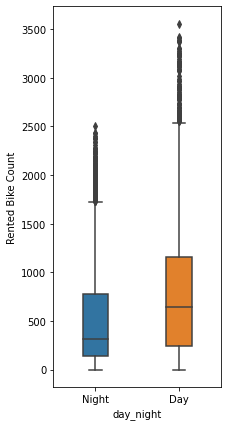

In [88]:
plt.figure(figsize = (3, 7))
sns.boxplot(y = 'Rented Bike Count', x = 'day_night', data = df, width = 0.3)

*Observation:*

---
According to this plot, we can sure that there is much more demand of bikes during day than night as the median for the day is around 600 and for the night, median is around 350.

([<matplotlib.patches.Wedge at 0x7fca2d82c810>,
 [Text(1.292159112565852, 0.14256517040648442, 'Holiday'),
  Text(-1.0933654043521348, -0.12063205447099314, 'No Holiday')],
 [Text(0.7951748385020627, 0.08773241255783656, '3.5%'),
  Text(-0.5963811296466189, -0.06579930243872352, '96.5%')])

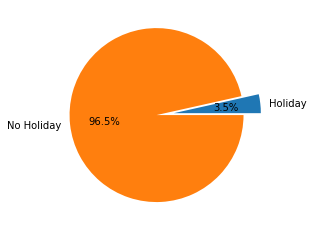

In [94]:
plt.pie(df.groupby('Holiday').sum()['Rented Bike Count'], labels = ['Holiday', 'No Holiday'], explode = (0.2, 0), autopct = '%1.1f%%')

*Observation:*

---
With this we can confirm that people uses bikes mostly for going to school or for work as the demand for rented bikes is most when there is no holiday.

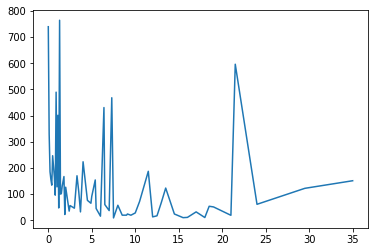

In [100]:
plt.plot(df.groupby('Rainfall(mm)').mean()['Rented Bike Count'])

*Observation:*

---
We can see that even if it rains a lot, korean people rent bikes.For example, here even if we have 20 mm of rain there is a big peak of rented bikes.

In [101]:
df.loc[(df['Rainfall(mm)'] >= 20) & (df['Rainfall(mm)'] <= 25)]

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,day_night,weekday,month,weekdays
5034,2018-06-28,596,18,20.6,97,0.7,222,0.14,21.5,0.0,Summer,No Holiday,Yes,Day,Thursday,6,Thursday
5132,2018-07-02,61,20,23.5,97,0.1,1814,0.04,24.0,0.0,Summer,No Holiday,Yes,Day,Monday,7,Monday
6524,2018-08-29,19,20,23.4,98,0.6,70,0.00,21.0,0.0,Summer,No Holiday,Yes,Day,Wednesday,8,Wednesday


*Observation:*

---
We can see that, these days of rainfall are in the summer and the temperature is not bad, furthermore theses are Week Days, that's why we have so much rented bike even if the rain is so important.

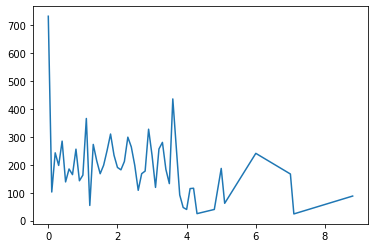

In [102]:
plt.plot(df.groupby('Snowfall (cm)').mean()['Rented Bike Count'])


*Observation:*

---
When we have more than 4 cm of snow, the bike rents is much lower.